            x          y
0  -15.782689  -0.254265
1   -3.977557   4.819669
2  -18.330663 -28.667342
3  -40.254848 -17.583849
4  -35.352412 -16.411859
5   -0.785538  14.015280
6    2.393177  38.056014
7   -8.767911  13.764614
8  -25.912887  -2.752717
9  -18.022458  12.628714
10   2.706564  34.568426
11 -25.282147  -7.125060
12   2.786527  19.962042
13  18.079987  -9.952786
14  33.559819  -4.432935
15  28.712898 -24.022064
16  26.195718 -13.391081
17  42.174709 -13.849395
18  35.859710   0.628594


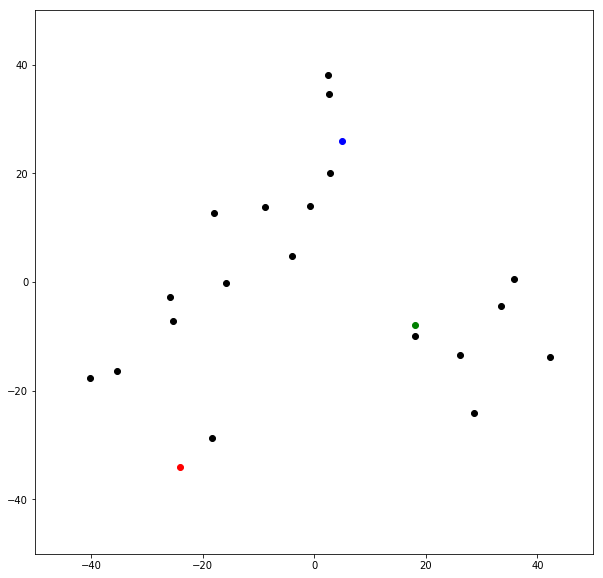

In [2]:
import pandas as pd #penggunaan library pandas untuk....

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8,  19, 7, 24],
    'z': [40, 50, 12,  7,  8, 55, 78, 45, 20, 35, 67, 15, 55, 45, 60, 40, 45, 55, 60]
})


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
        , columns = ['x', 'y'])

print(principalDf)


np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-50,50), np.random.randint(-50, 50)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(10, 10))
plt.scatter(principalDf['x'], principalDf['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()


            x          y  distance_from_1  distance_from_2  distance_from_3  \
0  -15.782689  -0.254265        34.731813        34.659291        33.484423   
1   -3.977557   4.819669        43.679113        25.443210        23.004411   
2  -18.330663 -28.667342         7.783227        41.797800        59.437683   
3  -40.254848 -17.583849        23.102166        59.037932        62.829557   
4  -35.352412 -16.411859        20.933704        54.011473        58.541293   
5   -0.785538  14.015280        53.332714        28.940785        13.308117   
6    2.393177  38.056014        76.737663        48.628483        12.334626   
7   -8.767911  13.764614        50.134568        34.499557        18.419013   
8  -25.912887  -2.752717        31.305780        44.225283        42.217595   
9  -18.022458  12.628714        47.010297        41.510978        26.623764   
10   2.706564  34.568426        73.585797        45.232290         8.870049   
11 -25.282147  -7.125060        26.905507        43.

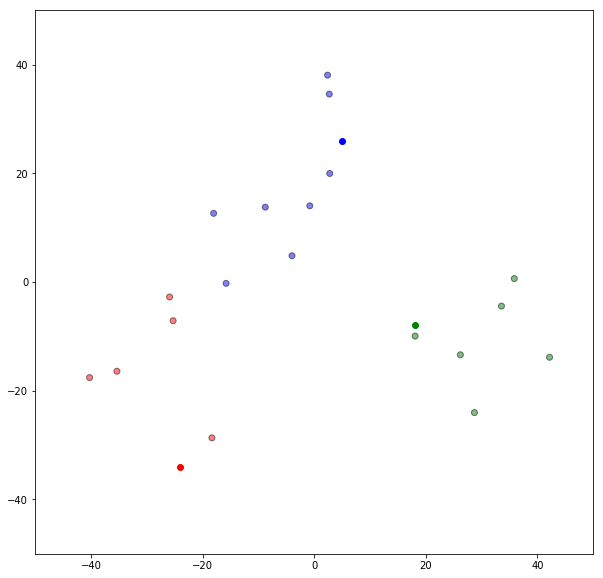

In [3]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(principalDf, centroids)
print(df)

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

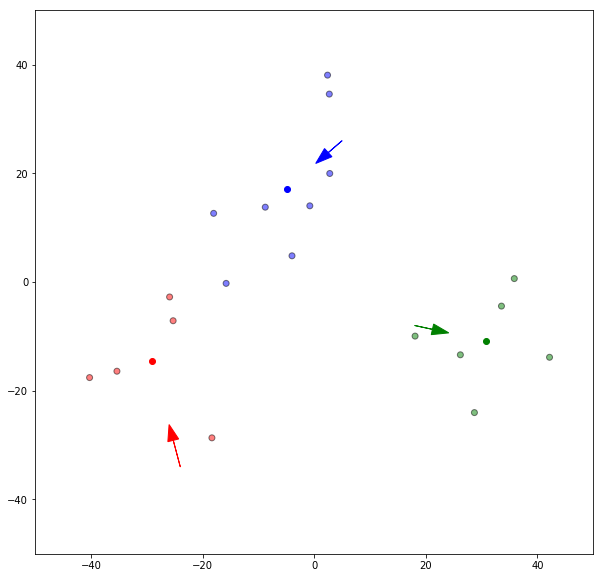

In [4]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(principalDf['x'], principalDf['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.25
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.25
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

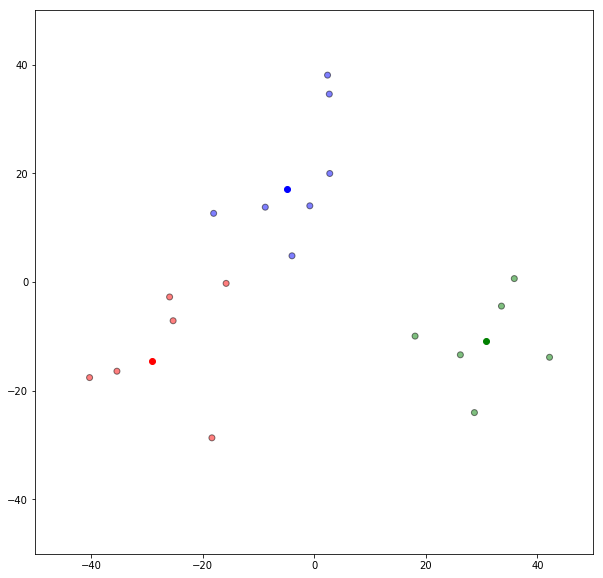

In [5]:
df = assignment(principalDf, centroids)

# Plot results
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

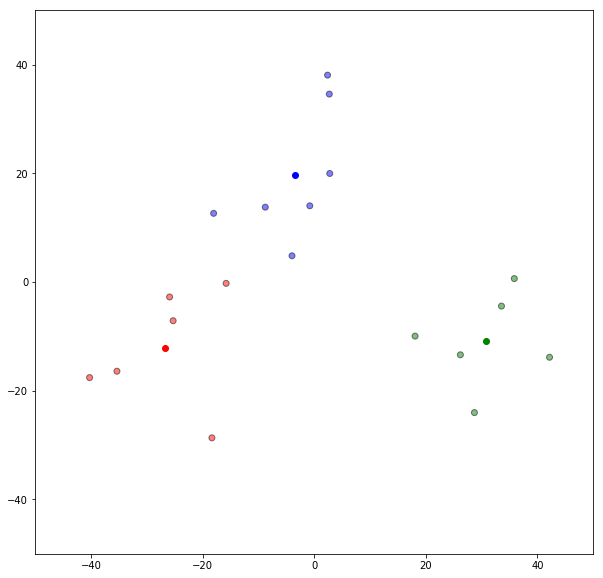

In [6]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

In [7]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8,  19, 7, 24],
    'z': [40, 50, 12,  7,  8, 55, 78, 45, 20, 35, 67, 15, 55, 45, 60, 40, 45, 55, 60]
})


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
        , columns = ['x', 'y'])

print(principalDf)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)

            x          y
0  -15.782689  -0.254265
1   -3.977557   4.819669
2  -18.330663 -28.667342
3  -40.254848 -17.583849
4  -35.352412 -16.411859
5   -0.785538  14.015280
6    2.393177  38.056014
7   -8.767911  13.764614
8  -25.912887  -2.752717
9  -18.022458  12.628714
10   2.706564  34.568426
11 -25.282147  -7.125060
12   2.786527  19.962042
13  18.079987  -9.952786
14  33.559819  -4.432935
15  28.712898 -24.022064
16  26.195718 -13.391081
17  42.174709 -13.849395
18  35.859710   0.628594


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = kmeans.predict(principalDf)
centroids = kmeans.cluster_centers_

In [9]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')


#colors = map(lambda x: colmap[x+1], labels)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()


<Figure size 720x720 with 0 Axes>